In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd

Mounted at /content/drive/
/root


In [2]:
import numpy as np # linear algebra
import pandas as pd  # data processing
from keras.optimizers import RMSprop
import os #  to interact with files using there paths
from sklearn.datasets import load_files

In [8]:
# Import necessary libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
train_dir = '/content/drive/MyDrive/Plant_Dataset/Train'
test_dir = '/content/drive/MyDrive/Plant_Dataset/Test'
validation_dir = '/content/drive/MyDrive/Plant_Dataset/Validation'

# Image dimensions
img_width, img_height = 64, 64

# Batch size
batch_size = 32

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for testing and validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating data from directories for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')  # Assuming you have multiple classes

# Generating data from directories for validation
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')  # Assuming you have multiple classes

Found 40 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [5]:
folders=os.listdir("/content/drive/MyDrive/Plant_Dataset")
print(folders)

['Test', 'Train', 'Validation']


In [6]:
folders=os.listdir("/content/drive/MyDrive/Plant_Dataset/Test")
print(folders)

['Citrus Lemon (Lemon)', 'Ficus Religiosa (Peepal Tree)', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Ocimum Tenuiflorum (Tulsi)', 'Psidium Guajava (Guava)', 'Santalum Album (Sandalwood)']


In [55]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/content/drive/MyDrive/Plant_Dataset/Train/Mentha (Mint)/M-S-003.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Mentha (Mint)/M-S-001.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Ocimum Tenuiflorum (Tulsi)/OT-S-001.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Citrus Lemon (Lemon)/CL-S-005.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Jasminum (Jasmine)/J-S-001.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Mangifera Indica (Mango)/MI-S-001.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Ocimum Tenuiflorum (Tulsi)/OT-S-004.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Jasminum (Jasmine)/J-S-002.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Mangifera Indica (Mango)/MI-S-004.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Ocimum Tenuiflorum (Tulsi)/OT-S-005.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Ocimum Tenuiflorum (Tulsi)/OT-S-003.jpg'
 '/content/drive/MyDrive/Plant_Dataset/Train/Santalum Album (Sandalwood)/SA-S-001.jpg'
 '/conten

In [56]:
# Remove .pyc or .py files
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)

print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  40
Number of training targets :  40


In [57]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 64,64
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr

X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item : ',X[0])

(40, 64, 64, 3)
First training item :  [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


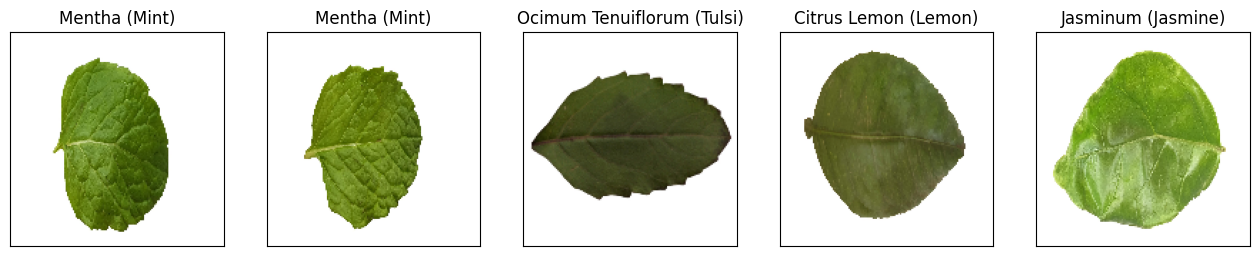

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [58]:
# Let's resize or rescale training data
X = X.astype('float32')/255

# Let's confirm the number of classes :)
no_of_classes = len(np.unique(y))
no_of_classes

8

In [59]:
y

array([4, 4, 5, 0, 2, 3, 5, 2, 3, 5, 5, 7, 7, 0, 7, 6, 6, 3, 7, 1, 2, 1,
       3, 2, 6, 1, 6, 0, 5, 2, 6, 4, 1, 4, 4, 3, 1, 7, 0, 0])

In [60]:
# let's convert a class vector (integers) to binary class matrix.
import tensorflow as tf
y = np.array([0, 1, 2, 2, 1,])
no_of_classes = 27
y = np.array(tf.keras.utils.to_categorical(y, no_of_classes))
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:
import numpy as np
import tensorflow as tf

# Define the class vector with 1542 samples
y = np.array([1,] * 40)

# Define the number of classes
no_of_classes = 8

# Convert the class vector to a binary class matrix
y_binary = np.array(tf.keras.utils.to_categorical(y, no_of_classes))

# Print the first row of the binary class matrix
print(y_binary[0])


[0. 1. 0. 0. 0. 0. 0. 0.]


In [62]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(8, activation='softmax'))  # Output layer with 8 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [88]:
# Getting the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)        

In [65]:
!pip install tensorflow
from keras.optimizers import legacy
from keras.optimizers import RMSprop
optimizer = legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
print(y_train.shape)

(32,)


In [89]:
# Print the number of layers in the model
print(len(model.layers))

# Print the type of the last layer
print(type(model.layers[-1]))

10
<class 'keras.src.layers.core.dense.Dense'>


In [68]:
# Print the number of units in the last layer
print(model.layers[-1].units)

8


In [91]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (your model definition)

epochs = 5
batch_size = 32

# Class imbalance handling (if necessary)
# ... (implement techniques like oversampling, undersampling, or weighted sampling)

train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    # Add targeted augmentations as needed
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Plant_Dataset/Train",
    target_size=(64, 64),  # Adjust image size as needed
    batch_size=batch_size,
    class_mode="categorical",
)  # "categorical" for multi-class classification

validation_generator = test_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Plant_Dataset/Validation",
    target_size=(64, 64),  # Adjust image size as needed
    batch_size=batch_size,
    class_mode="categorical",
)

checkpointer = ModelCheckpoint(
    filepath="/content/drive/MyDrive/Plant_Dataset/Test", save_best_only=True, verbose=1
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.00001
)

early_stopping = EarlyStopping(monitor="")

Found 40 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [73]:
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()

In [77]:
print('The test Data Shape ', X_test.shape[0])
print('The training Data Shape ', X_train.shape[0])

The test Data Shape  8
The training Data Shape  8


In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your training and testing directories
train_dir = '/content/drive/MyDrive/Plant_Dataset/Train'
test_dir = '/content/drive/MyDrive/Plant_Dataset/Test'

# Define image dimensions and batch size
img_height = 64
img_width = 64
batch_size = 32

# Use ImageDataGenerator to load and preprocess images from directories
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1] range
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Shuffle training data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle testing data
)

# Optionally, you can get X_train, y_train, X_test, and y_test from the generators
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()

Found 40 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [93]:
print(len(test_generator))

2


In [94]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

2/2 - 1s - loss: 2.1012 - accuracy: 0.1250 - 908ms/epoch - 454ms/step


In [95]:
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.125
Test Loss: 2.1012091636657715


In [96]:
# ... (data preparation, model definition)

# Train the model and capture history
history = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Plant_Dataset/Train",
    target_size=(64, 64),  # Adjust image size as needed
    batch_size=batch_size,
    class_mode="categorical",
)  # "categorical" for multi-class classification

# ... (other code)

# Now you can use history for plotting
#plot(history)

Found 40 images belonging to 8 classes.


In [97]:
print(type(history))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [98]:
import matplotlib.pyplot as plt

def plot(history):
    plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

In [99]:
print(f"Logits shape: {model.output.shape}")
print(f"Labels shape: {validation_generator.labels.shape}")

Logits shape: (None, 8)
Labels shape: (40,)


In [100]:
print(f"Number of validation samples: {len(validation_generator.labels)}")

Number of validation samples: 40


Epoch 1/5
1/1 [==============================] - ETA: 0s - loss: 1.9784 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 273.73590, saving model to /content/drive/MyDrive/Plant_Dataset/Test
1/1 [==============================] - 21s 21s/step - loss: 1.9784 - accuracy: 0.5000 - val_loss: 273.7359 - val_accuracy: 0.1250
Epoch 2/5
1/1 [==============================] - ETA: 0s - loss: 2.4864 - accuracy: 0.0938
Epoch 2: val_loss improved from 273.73590 to 110.59937, saving model to /content/drive/MyDrive/Plant_Dataset/Test
1/1 [==============================] - 3s 3s/step - loss: 2.4864 - accuracy: 0.0938 - val_loss: 110.5994 - val_accuracy: 0.1250
Epoch 3/5
1/1 [==============================] - ETA: 0s - loss: 1.9388 - accuracy: 0.2500
Epoch 3: val_loss improved from 110.59937 to 99.12539, saving model to /content/drive/MyDrive/Plant_Dataset/Test
1/1 [==============================] - 3s 3s/step - loss: 1.9388 - accuracy: 0.2500 - val_loss: 99.1254 - val_accuracy: 0.2500
Epoch 4

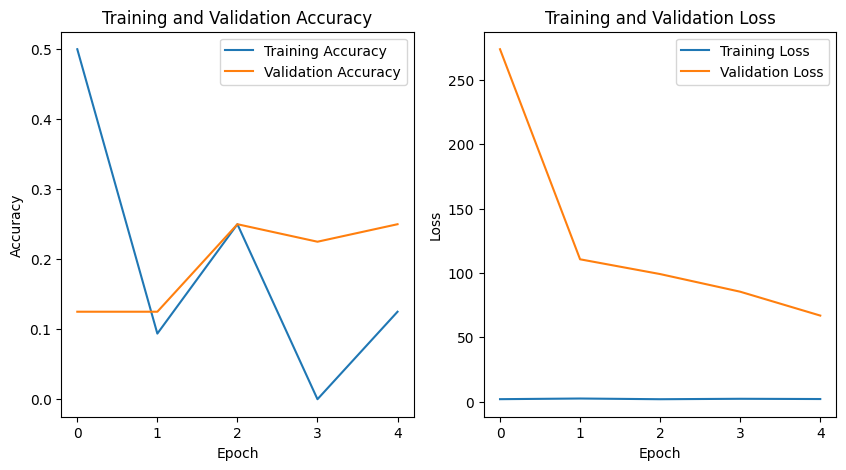

In [101]:
# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose=1,
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[checkpointer]
)

# Plot the training history
plot(history)

In [102]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [103]:
print(X_test.shape)
print(labels.shape)
print(model.predict(X_test).shape)

(32, 64, 64, 3)
(8,)
1/1 [==============================] - 0s 256ms/step
(32, 8)


In [105]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of X_test: (32, 64, 64, 3)
Shape of y_test: (32, 8)
Shape of labels: (8,)


In [106]:
X_test = X_test[:len(labels)]
y_test = y_test[:len(labels)]

In [107]:
pad_width = (0, len(X_test) - len(labels))
print(f"pad_width: {pad_width}")

pad_width: (0, 0)


In [108]:
padding_length = len(X_test) + len(labels)
labels = np.pad(labels, (0, padding_length), 'constant')

In [109]:
labels = np.pad(labels, (0, len(X_test) + len(labels)), 'constant')

In [111]:
labels = labels[:len(y_test)]

In [112]:
# Check the length of the labels list
print(len(labels))

# Check the length of the y_test array
print(len(y_test))

8
8


In [113]:
!pip install scikit-learn
!pip install matplotlib

In [114]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [116]:
def preprocess_image(image_data, target_shape):
    image = Image.fromarray(image_data)  # Convert NumPy array to PIL Image
    image = image.resize(target_shape[:2])  # Resize to match width and height
    image = np.array(image)  # Convert back to NumPy array
    return image

In [117]:
import os
import numpy as np

# Function to recursively search for image files in a directory
def find_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to check if an object is a NumPy array of image data
def is_image_array(obj):
    if isinstance(obj, np.ndarray):
        if len(obj.shape) == 4 and obj.shape[-1] in [1, 3]:  # Assuming last dimension represents channels
            return True
    return False

# Function to recursively search for NumPy arrays containing image data
def find_image_arrays(obj):
    image_arrays = []
    if is_image_array(obj):
        image_arrays.append(obj)
    if isinstance(obj, (list, tuple)):
        for item in obj:
            image_arrays.extend(find_image_arrays(item))
    elif isinstance(obj, dict):
        for key, value in obj.items():
            image_arrays.extend(find_image_arrays(value))
    return image_arrays

# Example usage
project_directory = '/content/drive/MyDrive/Plant_Dataset/Test'
image_files = find_image_files(project_directory)
print("Found {} image files in the project directory.".format(len(image_files)))

# Assuming you have a variable named 'data' containing arrays of image data
# Replace 'data' with the actual variable name if it's different
image_arrays = find_image_arrays(data)
print("Found {} arrays containing image data.".format(len(image_arrays)))

Found 40 image files in the project directory.
Found 0 arrays containing image data.


In [118]:
# Define the variable image_data
image_data = np.array([0])

# Print the data type of image_data
print(image_data.dtype)

int64


In [119]:
import numpy as np

def predict_with_error_handling(model, X_test, y_test):
    if len(X_test) != len(y_test):
        print("Error: Mismatch between the number of samples in X_test and y_test.")
        return None

    predictions = []
    mismatches = 0

    for i in range(len(X_test)):
        try:
            prediction = model.predict(np.expand_dims(X_test[i], axis=0))
            predictions.append(prediction)
        except Exception as e:
            print("Error occurred while making prediction for sample {}: {}".format(i, str(e)))
            mismatches += 1

    if mismatches > 0:
        print("Total {} mismatches occurred while making predictions.".format(mismatches))

    return predictions

# Example usage
# Replace 'model', 'X_test', and 'y_test' with your actual model and data
predicted_values = predict_with_error_handling(model, X_test, y_test)
if predicted_values is not None:
    print("Predictions made successfully.")

1/1 [==============================] - 0s 20ms/step
Predictions made successfully.


In [131]:
# Assuming you have 'predicted_values', which contains the predictions made by the model
# and 'y_test', which contains the true labels

# Convert the list of predictions to a numpy array
predicted_values = np.array(predicted_values)

# Assuming predicted_values has shape (num_samples, num_classes)
# and each row contains the predicted probabilities for each class
# You can extract the predicted class by taking the argmax along the second axis
predicted_classes = np.argmax(predicted_values, axis=1)

# Display the predicted classes along with the true labels
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True label: {y_test[i]}")

Predicted class: [0 0 0 0 0 0 0 0], True label: [1. 0. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [1. 0. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [1. 0. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [1. 0. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [1. 0. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [0. 1. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [0. 1. 0. 0. 0. 0. 0. 0.]
Predicted class: [0 0 0 0 0 0 0 0], True label: [0. 1. 0. 0. 0. 0. 0. 0.]


In [133]:
# Convert one-hot encoded true labels to class indices
true_labels = np.argmax(y_test, axis=1)

# Display the predicted classes along with the true labels
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True label: {true_labels[i]}")

Predicted class: [0 0 0 0 0 0 0 0], True label: 0
Predicted class: [0 0 0 0 0 0 0 0], True label: 0
Predicted class: [0 0 0 0 0 0 0 0], True label: 0
Predicted class: [0 0 0 0 0 0 0 0], True label: 0
Predicted class: [0 0 0 0 0 0 0 0], True label: 0
Predicted class: [0 0 0 0 0 0 0 0], True label: 1
Predicted class: [0 0 0 0 0 0 0 0], True label: 1
Predicted class: [0 0 0 0 0 0 0 0], True label: 1


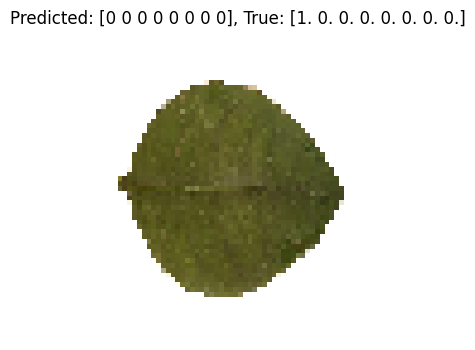

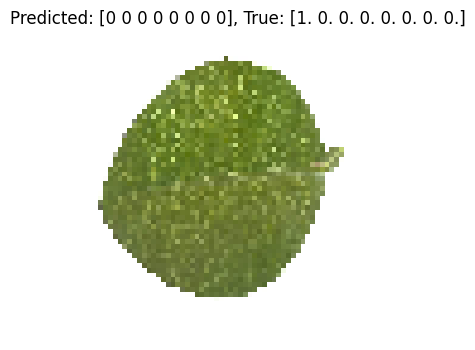

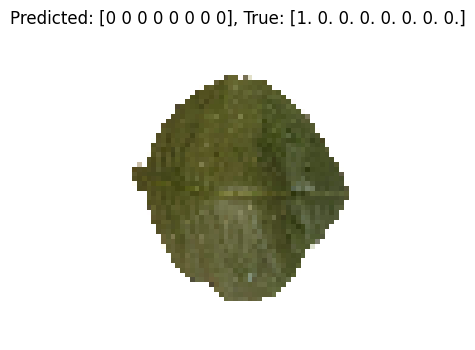

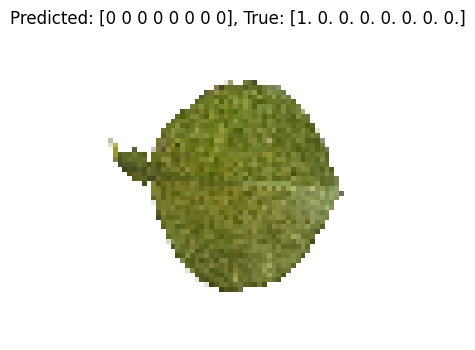

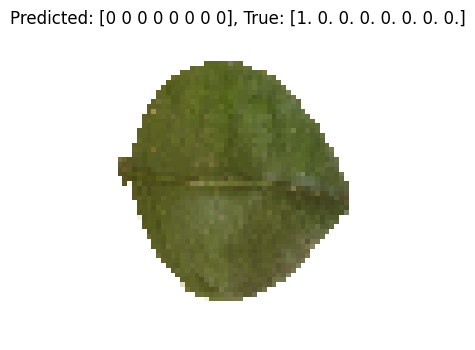

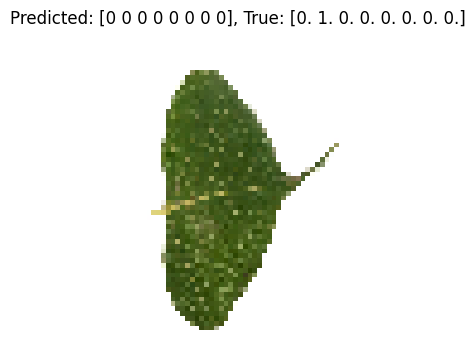

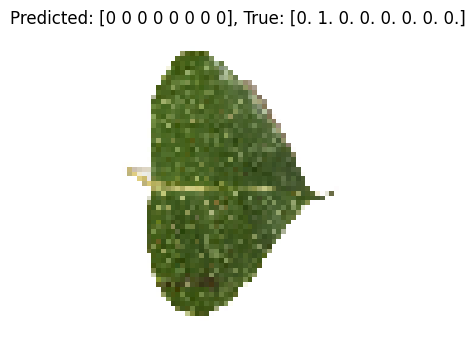

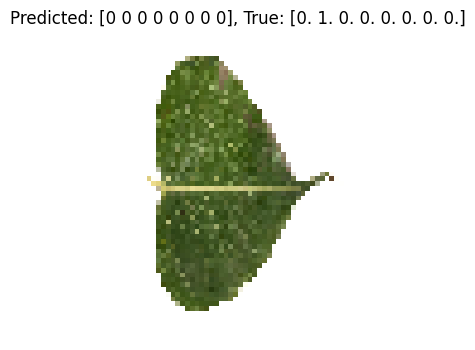

In [135]:
import matplotlib.pyplot as plt

# Assuming you have 'X_test' containing the images
# and 'predicted_classes' and 'y_test' containing the predicted classes and true labels

# Display the leaf images along with their predicted classes and true labels
for i in range(len(X_test)):
    plt.figure(figsize=(4, 4))
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {predicted_classes[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()

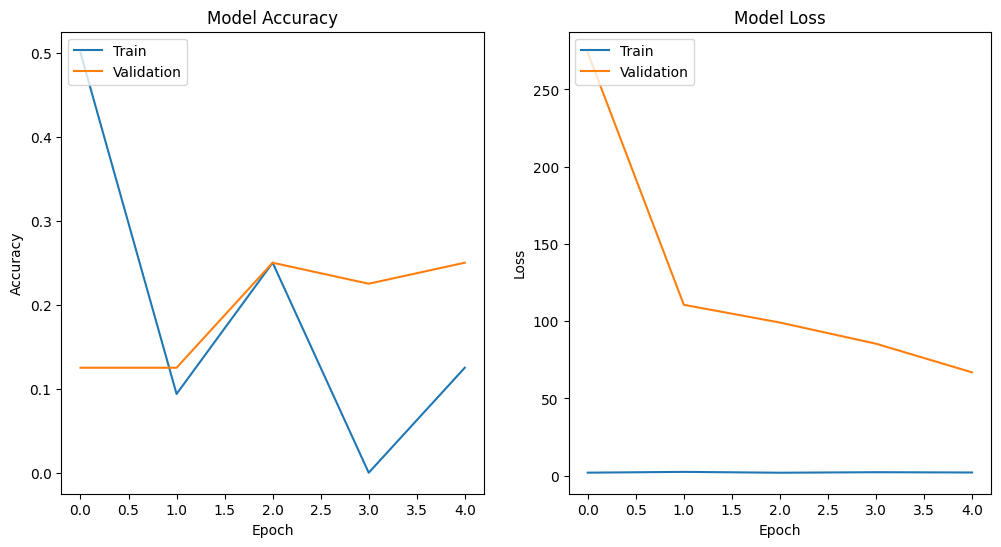

In [124]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Usage:
plot_training_history(history)

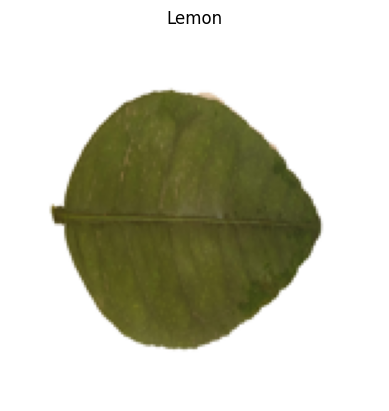

In [130]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Import Image module from PIL

def preprocess_image(image_path, target_shape):
    try:
        image = Image.open(image_path)  # Open image using correct path
        image = image.resize(target_shape[:2])  # Resize to match width and height
        image = np.array(image)  # Convert to numpy array
        return image
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")  # Print specific error
        return None

def extract_folder_name(folder_path):
    match = re.search(r'\((.*?)\)', folder_path)
    if match:
        return match.group(1)
    else:
        return folder_path

# Example usage
image_path = "/content/drive/MyDrive/Plant_Dataset/Test/Citrus Lemon (Lemon)/CL-S-001.jpg"
target_shape = (150, 150, 3)
preprocessed_image = preprocess_image(image_path, target_shape)
if preprocessed_image is not None:
    # Get the folder name containing the image
    folder_name = os.path.basename(os.path.dirname(image_path))

    # Extract only the name from the folder name
    name_from_brackets = extract_folder_name(folder_name)

    # Display the image with the extracted name as title
    plt.imshow(preprocessed_image)
    plt.title(name_from_brackets)
    plt.axis('off')
    plt.show()
else:
    print("Failed to preprocess image.")

In [143]:
import os

# Define the directory containing the image folders
dataset_dir = "/content/drive/MyDrive/Plant_Dataset/Train"

# Get a list of class names from the folder names
class_names = sorted(os.listdir(dataset_dir))

print("Class names:", class_names)

Class names: ['Citrus Lemon (Lemon)', 'Ficus Religiosa (Peepal Tree)', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Ocimum Tenuiflorum (Tulsi)', 'Psidium Guajava (Guava)', 'Santalum Album (Sandalwood)']


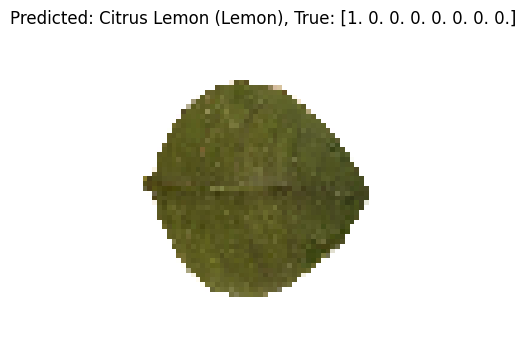

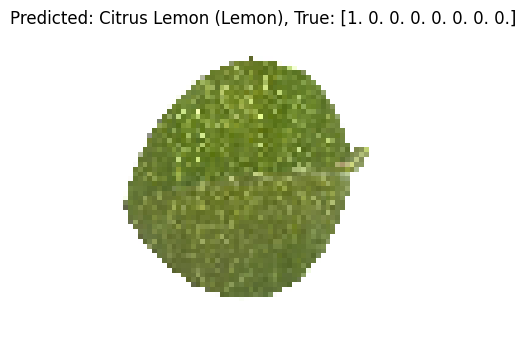

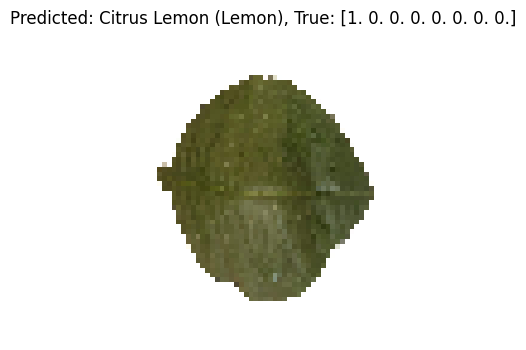

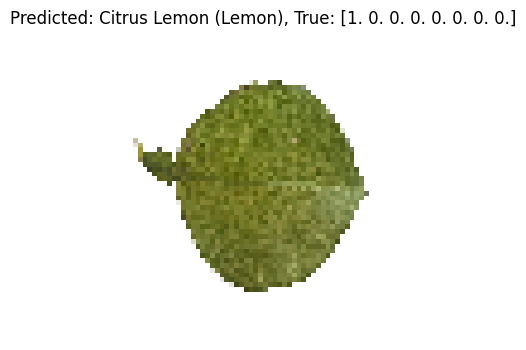

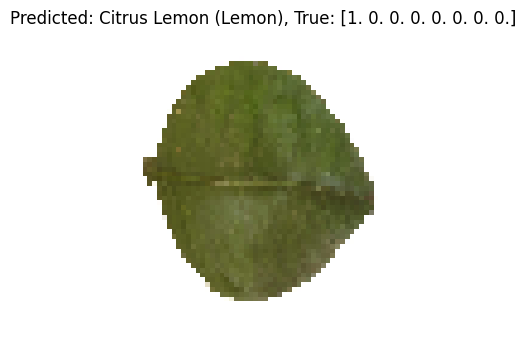

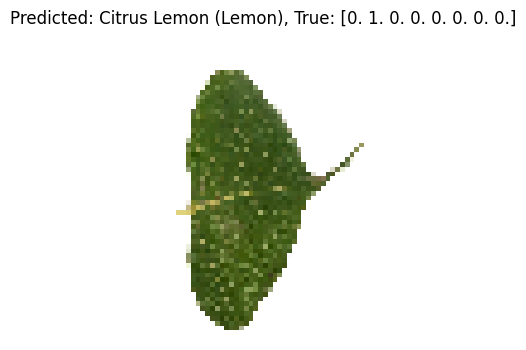

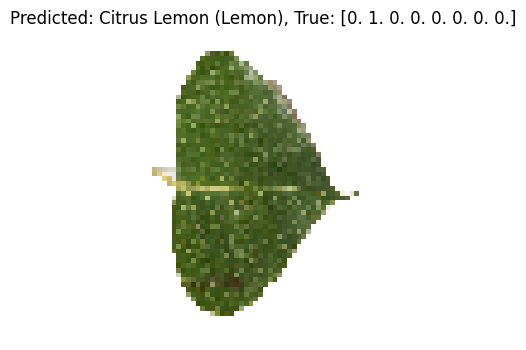

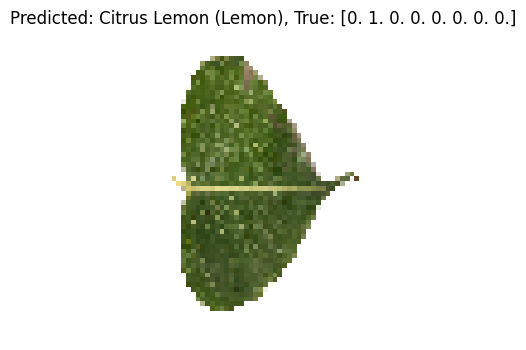

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assuming you have 'X_test' containing the images
# and 'predicted_classes' containing the predicted class probabilities

# Convert predicted probabilities to class indices
predicted_classes = np.argmax(predicted_classes, axis=1)

# Define the directory containing the image folders
dataset_dir = "/content/drive/MyDrive/Plant_Dataset/Train"

# Get a list of class names from the folder names
class_names = sorted(os.listdir(dataset_dir))

# Display the leaf images along with their predicted classes and true labels
for i in range(len(X_test)):
    plt.figure(figsize=(4, 4))
    plt.imshow(X_test[i])
    predicted_class_name = class_names[predicted_classes[i]]
    plt.title(f"Predicted: {predicted_class_name}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [157]:
import os

# Assuming 'X_test' contains the images and 'test_dir' is the directory containing the test images
test_dir = "/content/drive/MyDrive/Plant_Dataset/Train"

# Get a list of filenames of the images in the test directory
Plant = sorted(os.listdir(test_dir))

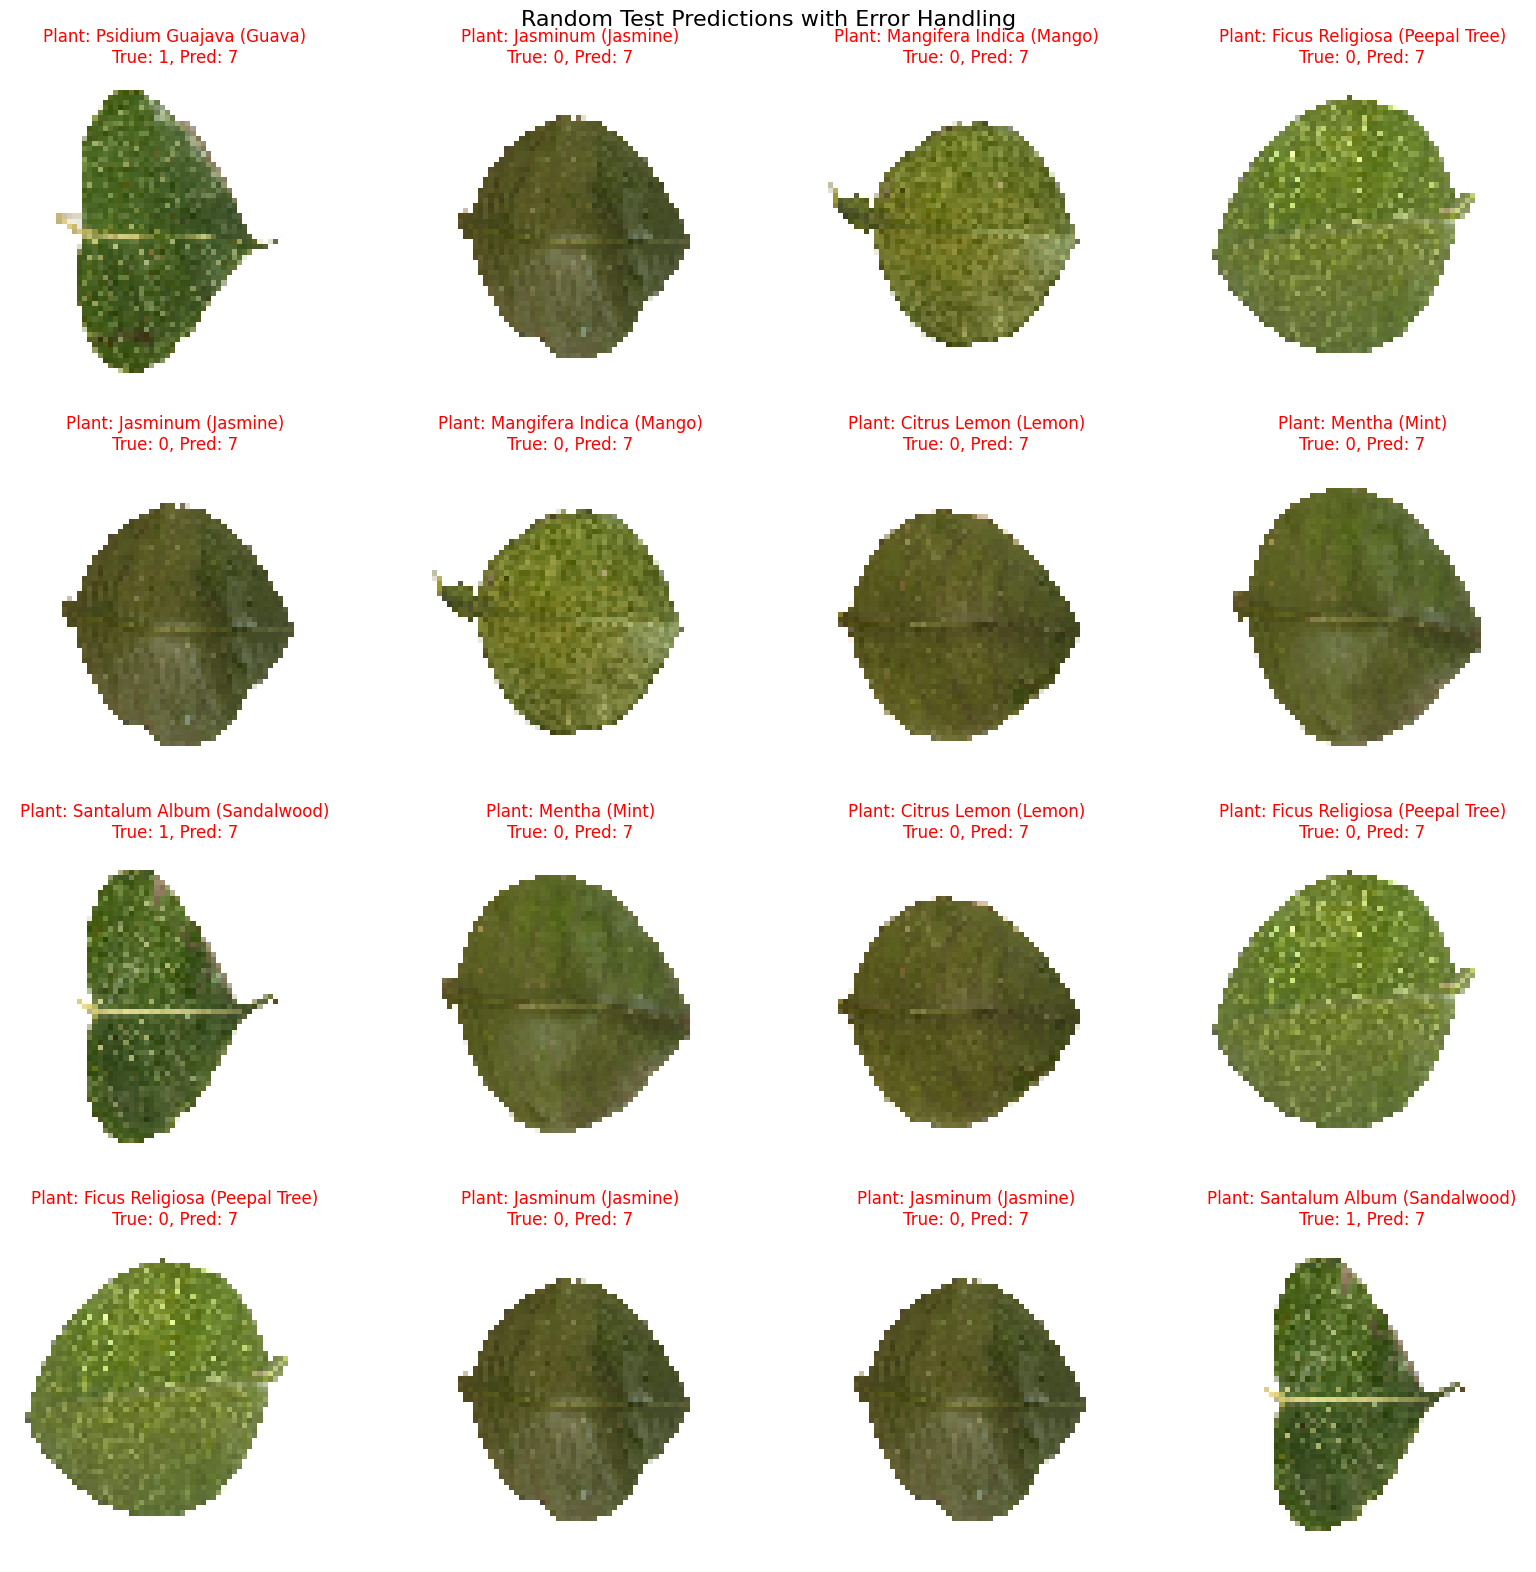

In [160]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_errors(X_test, y_test, predictions, Plant):
    if predictions is None:
        return

    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    fig.suptitle('Random Test Predictions with Error Handling', fontsize=16)

    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(len(X_test))
        ax.imshow(X_test[idx])
        ax.axis('off')

        if y_test[idx] is not None and predictions[idx] is not None:
            true_label = np.argmax(y_test[idx])
            pred_label = np.argmax(predictions[idx])
            color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"Plant: {Plant[idx]}\nTrue: {true_label}, Pred: {pred_label}", color=color)
        else:
            ax.set_title("Prediction Error")

    plt.tight_layout()
    plt.show()

# Example usagevisualize_errors(X_test, y_test, predicted_values, Plant)
visualize_errors(X_test, y_test, predicted_values, Plant)

In [161]:
from tensorflow.keras.models import save_model

In [162]:
save_model(model, '/content/drive/MyDrive/Plant_Dataset/Test/CNN_model.h5')

<ipython-input-162-504a9be3e000>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '/content/drive/MyDrive/Plant_Dataset/Test/CNN_model.h5')


**STREAMLIT WEBAPP IMPLEMENTATION**

```
# Create a site to use custom pre_trained CNN model for medicinal plant identification
```




In [163]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [164]:
import streamlit as st
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

In [166]:
# Load the pre-trained CNN model
model = load_model("/content/drive/MyDrive/Plant_Dataset/Test/CNN_model.h5")

In [167]:
# Define class names
class_names = ['Citrus Lemon (Lemon)', 'Ficus Religiosa (Peepal Tree)', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Ocimum Tenuiflorum (Tulsi)', 'Psidium Guajava (Guava)', 'Santalum Album (Sandalwood)']

In [168]:
# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to match the input size of the CNN model
    resized_image = image.resize((64, 64))
    # Convert the image to a numpy array
    img_array = np.array(resized_image)
    # Normalize the pixel values to be between 0 and 1
    img_array = img_array / 255.0
    # Expand the dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [169]:
# Function to make predictions
def make_prediction(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    # Make a prediction using the pre-trained model
    prediction = model.predict(processed_image)
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

In [170]:
# Streamlit app
def main():
    # Set title and description
    st.title("Plant Species Prediction")
    st.write("Upload an image of a plant to predict its species.")

    # Upload image
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Make prediction when button is clicked
        if st.button('Predict'):
            # Make prediction
            predicted_class_name = make_prediction(image)
            st.success(f"Predicted Plant Species: {predicted_class_name}")

if __name__ == '__main__':
    main()

2024-05-01 19:06:28.884 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [214]:
%%writefile script.py

import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import base64

# Load the pre-trained CNN model
model = load_model("/content/drive/MyDrive/Plant_Dataset/Test/CNN_model.h5")

# Define class names
class_names = ['Citrus Lemon (Lemon)', 'Ficus Religiosa (Peepal Tree)', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Ocimum Tenuiflorum (Tulsi)', 'Psidium Guajava (Guava)', 'Santalum Album (Sandalwood)']


def predict(image):
    IMG_SIZE = (1, 64, 64, 3)

    img = image.resize(IMG_SIZE[1:-1])
    img_arr = np.array(img)
    img_arr = img_arr.reshape(IMG_SIZE)

    pred_proba = model.predict(img_arr)
    pred = np.argmax(pred_proba)
    return pred

def add_bg_from_local(image_file):
    with open(image_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url(data:image/{"jpg"};base64,{encoded_string.decode()});
        background-size: cover;
        background-repeat: no-repeat;
    }}
    </style>
    """,
    unsafe_allow_html=True
    )

contnt = "<p>Herbal medicines are preferred in both developing and developed countries as an alternative to " \
         "synthetic drugs mainly because of no side effects. Recognition of these plants by human sight will be " \
         "tedious, time-consuming, and inaccurate.</p> " \
         "<p>Applications of image processing and computer vision " \
         "techniques for the identification of the medicinal plants are very crucial as many of them are under " \
         "extinction as per the IUCN records. Hence, the digitization of useful medicinal plants is crucial " \
         "for the conservation of biodiversity.</p>"

if __name__ == '__main__':
    add_bg_from_local("/content/drive/MyDrive/Plant_Dataset/medicinal_bg.jpg")

    new_title = '<p style="font-family:sans-serif; color:White; font-size: 42px;">Medicinal Leaf Classification</p>'
    st.markdown(new_title, unsafe_allow_html=True)
    st.markdown(contnt, unsafe_allow_html=True)
    uploaded_file = st.file_uploader("Choose a file")

    if uploaded_file is not None:
        img = Image.open(uploaded_file)

        img = img.resize((300, 300))
        st.image(img)

        if st.button("Predict"):
            pred = predict(img)
            name = class_names[pred]

            result = f'<p style="font-family:sans-serif; color:White; font-size: 16px;">The given image is {name}</p>'
            st.markdown(result, unsafe_allow_html=True)

Overwriting script.py


In [188]:
! wget -q -O - ipv4.icanhazip.com

34.16.154.174


In [ ]:
! streamlit run script.py & npx localtunnel --port 8501